In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, classification_report

In [2]:
df=pd.read_csv('Employee_Attrition.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
df1=df.drop_duplicates()
df1.shape

(11991, 10)

## Data exploration and visualization

In [8]:
df1['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

<Axes: xlabel='left'>

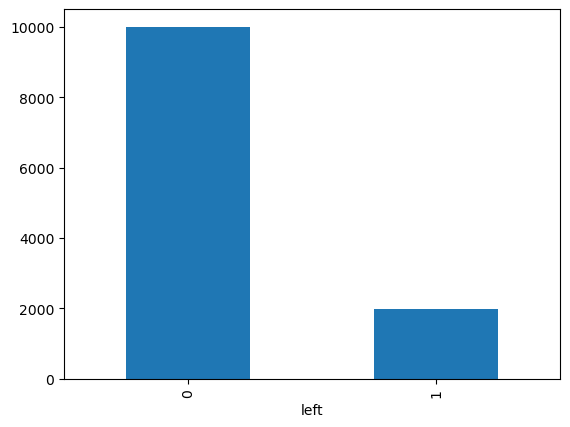

In [9]:
df1['left'].value_counts().plot(kind='bar')

### Impact of the salary on employee retention

<Axes: xlabel='salary'>

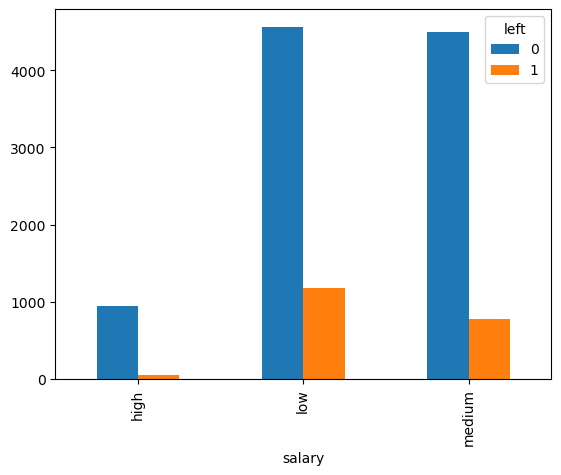

In [10]:
pd.crosstab(df1.salary, df1.left).plot(kind='bar')

#### Department wise employee retention rate

<Axes: xlabel='Department'>

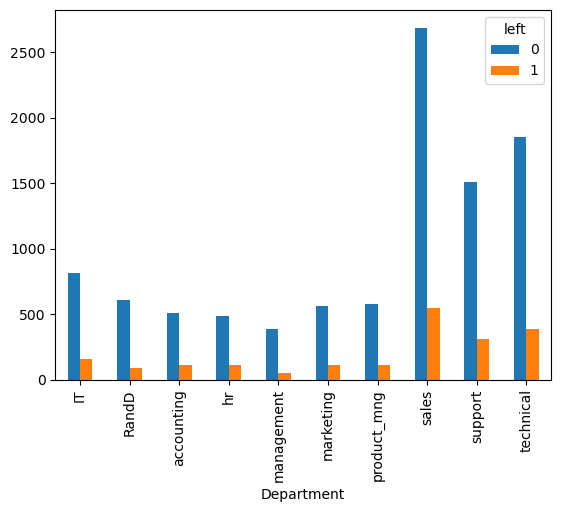

In [11]:
pd.crosstab(df1.Department, df1.left).plot(kind='bar')

#### Distribution of each numerical features

In [12]:
num_feature_list1=[f for f in df1.columns if df1.dtypes[f] == 'float64']
num_feature_list1

['satisfaction_level', 'last_evaluation']

In [13]:
num_feature_list2 =[f for f in df1.columns if df1.dtypes[f] == 'int64']
num_feature_list2

['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [14]:
num_col_list=['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years','satisfaction_level', 'last_evaluation']

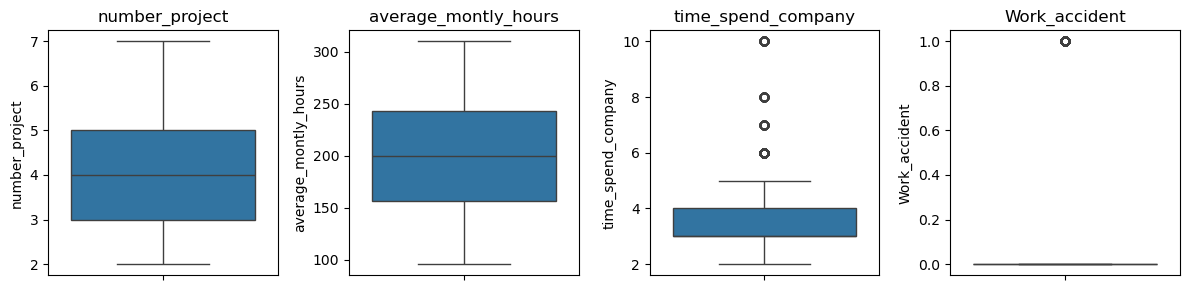

In [16]:
fig, axes = plt.subplots(ncols=4, figsize=(12,3))
for column, axis in zip(num_col_list[:4], axes):
    sns.boxplot(data=df1[column], ax=axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

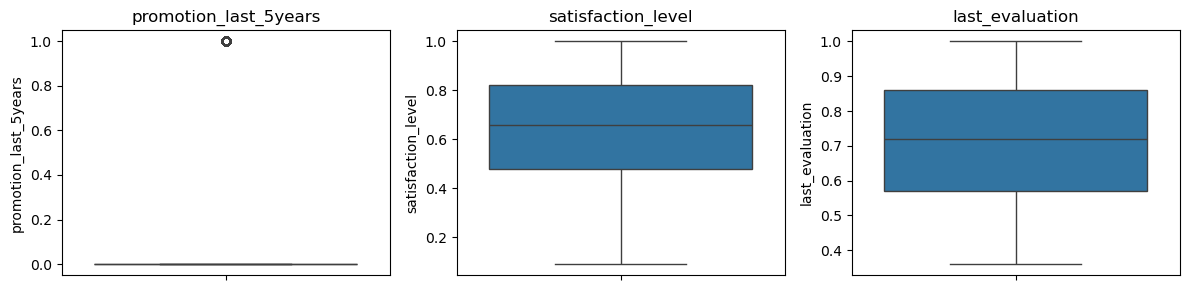

In [18]:
fig, axes = plt.subplots(ncols=3, figsize=(12,3))
for column, axis in zip(num_col_list[4:], axes):
    sns.boxplot(data=df1[column], ax=axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

<Axes: ylabel='Frequency'>

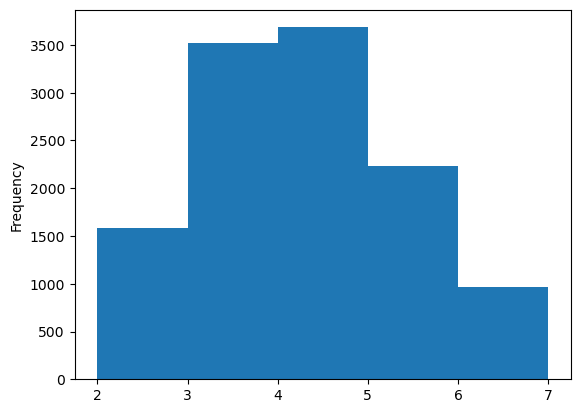

In [19]:
df1['number_project'].plot(kind='hist', bins=5)

<Axes: ylabel='Frequency'>

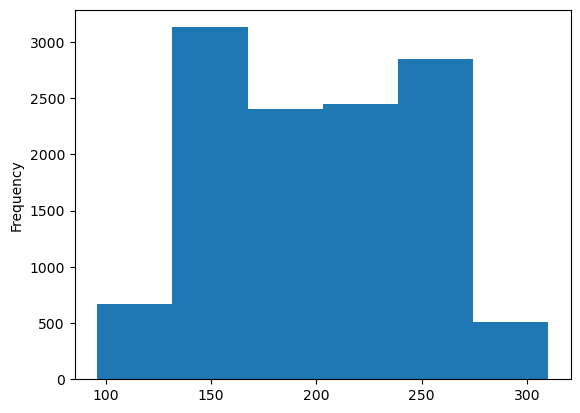

In [21]:
df1['average_montly_hours'].plot(kind='hist', bins=6)

<Axes: ylabel='Frequency'>

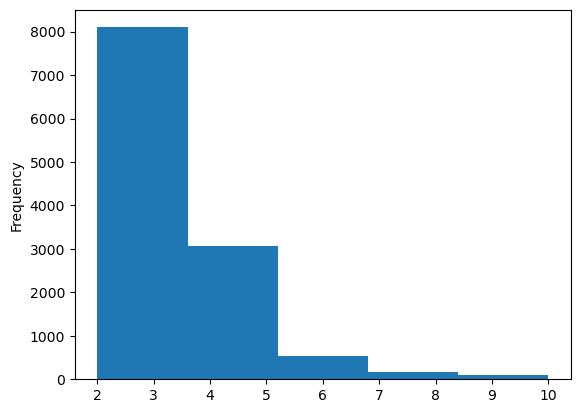

In [22]:
df1['time_spend_company'].plot(kind='hist', bins=5)

<Axes: ylabel='Frequency'>

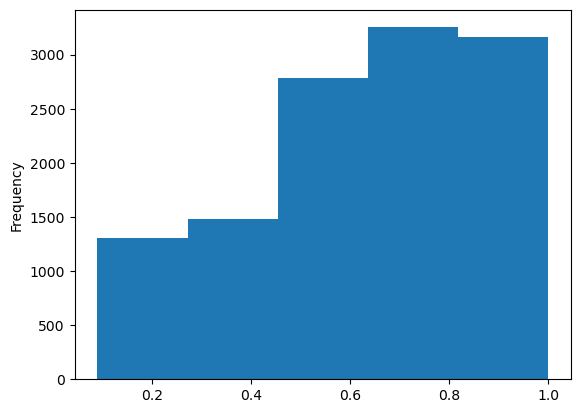

In [23]:
df1['satisfaction_level'].plot(kind='hist', bins=5)

<Axes: ylabel='Frequency'>

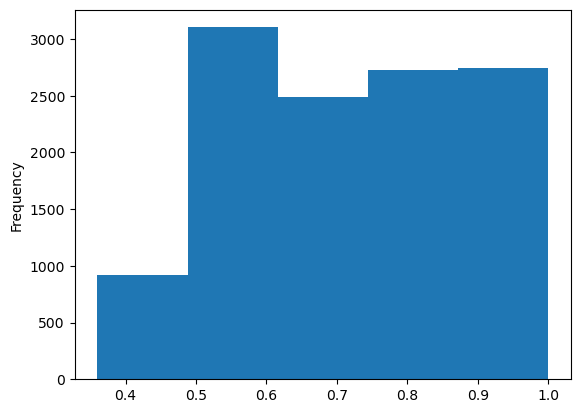

In [24]:
df1['last_evaluation'].plot(kind='hist', bins=5)

## Feature Engineering 

### Label Encoding: Converting categorical features into numerical

In [28]:
labelenc=LabelEncoder()

In [30]:
df1['salary']=labelenc.fit_transform(df1['salary'])
df1['Department']=labelenc.fit_transform(df1['Department'])

C:\Users\HP\AppData\Local\Temp\ipykernel_8320\4079881261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['salary']=labelenc.fit_transform(df1['salary'])
C:\Users\HP\AppData\Local\Temp\ipykernel_8320\4079881261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Department']=labelenc.fit_transform(df1['Department'])


In [31]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [32]:
# Dependent and independent variable
X=df1.drop('left', axis=1)
y=df1['left']

In [34]:
# spliting data into training and testing
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

#### Feature scaling

In [36]:
std_scaler = StandardScaler()

In [39]:
xtrain_scaled=std_scaler.fit_transform(X_train)
xtest_scaled=std_scaler.transform(X_test)

In [40]:
xtrain_scaled
xtest_scaled

array([[-2.22411457,  0.42709905,  1.88512402, ..., -0.13458786,
         0.39659936, -0.5534353 ],
       [ 0.46003576,  1.43787831,  0.16340358, ..., -0.13458786,
         0.74183391,  1.03464501],
       [ 0.7490981 ,  1.49733591,  0.16340358, ..., -0.13458786,
         0.39659936, -0.5534353 ],
       ...,
       [ 0.91427658,  0.18926863,  0.16340358, ..., -0.13458786,
         0.39659936, -0.5534353 ],
       [ 1.1620443 , -0.58368021,  1.0242638 , ..., -0.13458786,
        -0.63910427,  1.03464501],
       [-0.48974051, -0.58368021, -0.69745664, ..., -0.13458786,
         0.74183391, -0.5534353 ]])

# Model development

### Random forest

In [43]:
randfm=RandomForestClassifier()

In [44]:
#Model Training
randfm.fit(xtrain_scaled, y_train)

RandomForestClassifier()

In [46]:
# Model Prediction
y_pred=randfm.predict(xtest_scaled)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# Model Evaluation

### Confusion Matrix

In [49]:
cm=confusion_matrix(y_test, y_pred)

In [50]:
print(cm)

[[2494    7]
 [  44  453]]


<Axes: >

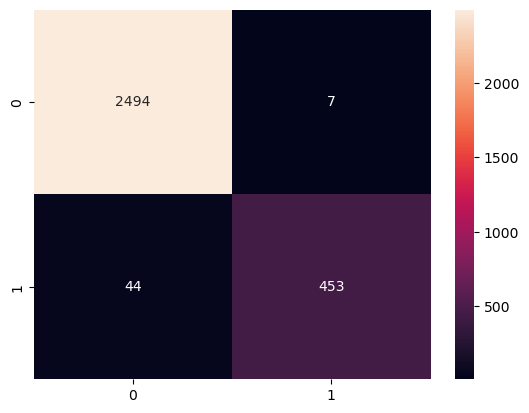

In [51]:
sns.heatmap(cm, annot=True, fmt='d')

In [56]:
acc=accuracy_score(y_test, y_pred)
print('Accuracy of the model = ',acc)

Accuracy of the model =  0.9829886591060707


In [57]:
precision=precision_score(y_test, y_pred)
print('Precision score of the model = ',precision)

Precision score of the model =  0.9847826086956522


In [59]:
recall=recall_score(y_test, y_pred)
print('recall score of the model = ',recall)

recall score of the model =  0.9114688128772636


In [60]:
f1=f1_score(y_test, y_pred)
print('f1 score of the model = ',f1)

f1 score of the model =  0.9467084639498433


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2501
           1       0.98      0.91      0.95       497

    accuracy                           0.98      2998
   macro avg       0.98      0.95      0.97      2998
weighted avg       0.98      0.98      0.98      2998



### Feature importance metrix in Random forest/feature extraction:

In [66]:
score_list=randfm.feature_importances_
list_of_features = list(X.columns)
score_df=pd.DataFrame({'feature':list_of_features, 'score': score_list})
score_df.sort_values(by='score', ascending=False)

,feature,score
0,satisfaction_level,0.365325
2,number_project,0.172870
4,time_spend_company,0.164086
3,average_montly_hours,0.152293
1,last_evaluation,0.120607
7,Department,0.011920
8,salary,0.008439
5,Work_accident,0.003868
6,promotion_last_5years,0.000591


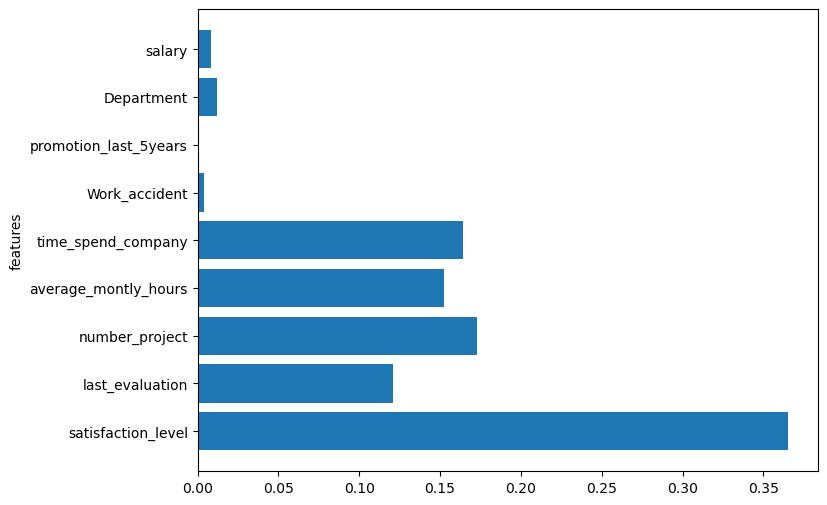

In [67]:
list_of_features=list(X.columns)
plt.figure(figsize=(8,6))
plt.barh(range(len(list_of_features)), randfm.feature_importances_)
plt.yticks(np.arange(len(list_of_features)), list_of_features)
plt.ylabel('features')
plt.show()

### K-Fold cross validation:

In [71]:
scores=cross_val_score(randfm, xtrain_scaled, y_train, cv=5, scoring='accuracy')
print('Cross-validation scores=', scores)

Cross-validation scores= [0.9844358  0.98332407 0.9844358  0.98609566 0.98776418]


In [74]:
Avg_Model_score=scores.mean()
print('Average Model Score= ', Avg_Model_score)

Average Model Score=  0.9852111017058668


### Hyper Parameter Tuning

In [75]:
parameters ={
    'n_estimators':[50,100],
    'max_features':['sqrt', 'log2', None]
}

In [76]:
# saerch best performance
grid_search=GridSearchCV(estimator=randfm,
                        param_grid=parameters)

In [78]:
grid_search.fit(xtrain_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

In [79]:
# best parameters:
grid_search.best_params_

{'max_features': 'log2', 'n_estimators': 50}

In [82]:
#Building new model with best parameters:
randfm_new=RandomForestClassifier(max_features='log2', n_estimators=100)

In [83]:
randfm_new.fit(xtrain_scaled, y_train)

RandomForestClassifier(max_features='log2')

In [85]:
# K fold cross validation: k=5
scores=cross_val_score(randfm_new, xtrain_scaled, y_train, cv=5, scoring='accuracy')
print('Cross validation scores= ', scores)

Cross validation scores=  [0.98499166 0.98387993 0.9844358  0.98609566 0.98665184]


In [87]:
Avg_Model_score=scores.mean()
print('Average Model score= ', Avg_Model_score)

Average Model score=  0.9852109780430484
